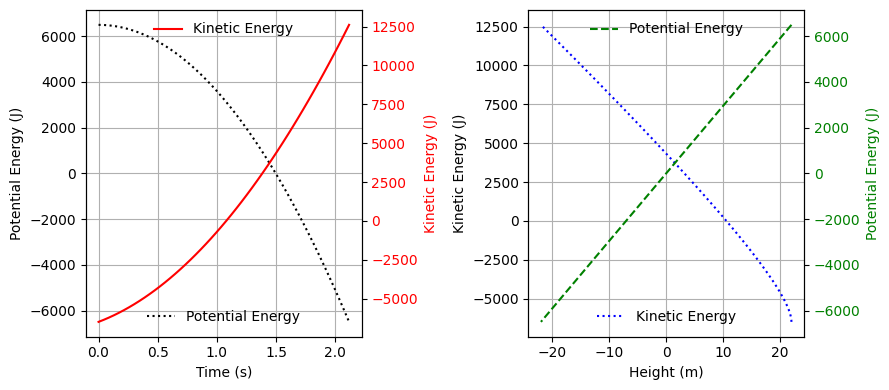

In [37]:
from tkinter import *
import numpy as np
import matplotlib.pyplot as plt

class mywin:
    def __init__(self,win):
        self.lbl1=Label(win, text='Massa jenis benda')
        self.lbl11=Label(win, text='kg/m^3')
        self.lbl2=Label(win, text='Jari-jari benda')
        self.lbl22=Label(win, text='cm')
        self.lbl3=Label(win, text='Ketinggian benda sebelum jatuh')
        self.lbl33=Label(win, text='m')
        self.lbl4=Label(win, text='Ketinggian benda saat jatuh')
        self.lbl44=Label(win, text='m')
        self.lbl5=Label(win, text='Energi Potensial sebelum jatuh')
        self.lbl55=Label(win, text='Joule')
        self.lbl6=Label(win, text='Energi Potensial saat jatuh')
        self.lbl66=Label(win, text='Joule')
        self.lbl7=Label(win, text='Energi Kinetik saat jatuh')
        self.lbl77=Label(win, text='Joule')
        self.btn1=Button(win, text='EP sebelum jatuh')
        self.btn2=Button(win, text='EP saat jatuh')
        self.btn3=Button(win, text='EK saat jatuh')
        self.btn4=Button(win, text='Grafik')
        self.t1=Entry()
        self.t2=Entry()
        self.t3=Entry()
        self.t4=Entry()
        self.t5=Entry()
        self.t6=Entry()
        self.t7=Entry()
        self.lbl1.place(x=40, y=40)
        self.t1.place(x=230, y=40)
        self.lbl11.place(x=370, y=40)
        self.lbl2.place(x=40, y=80)
        self.t2.place(x=230, y=80)
        self.lbl22.place(x=370, y=80)
        self.lbl3.place(x=40, y=120)
        self.t3.place(x=230, y=120)
        self.lbl33.place(x=370, y=120)
        self.lbl4.place(x=40, y=160)
        self.t4.place(x=230, y=160)
        self.lbl44.place(x=370, y=160)
        self.lbl5.place(x=40, y=240)
        self.t5.place(x=230, y=240)
        self.lbl55.place(x=370, y=240)
        self.lbl6.place(x=40, y=280)
        self.t6.place(x=230, y=280)
        self.lbl66.place(x=370, y=280)
        self.lbl7.place(x=40, y=320)
        self.t7.place(x=230, y=320)
        self.lbl77.place(x=370, y=320)
        self.b1=Button(win, text='EP dan EK', command=self.result)
        self.b1.place(x=40, y=200)
        self.b4=Button(win, text='Grafik', command=self.plot)
        self.b4.place(x=40, y=360)
    
    def massa(self):
        self.m += float(self.t1.get())*4/3*22/7*(float(self.t2.get())*0.01)**3
    
    def result(self):
        x = float(self.t1.get())*4/3*22/7*(float(self.t2.get())*0.01)**3
        y = float(self.t3.get())
        y2 = float(self.t4.get())
        self.ep1 = lambda m, h: m * h * 9.81
        self.ep2 = lambda m, h: m * h * 9.81
        self.ek2 = lambda ep1, ep2: ep1 - ep2 

        a= self.ep1 (x, y)
        b= self.ep2 (x, y2)
        c= self.ek2 (a, b)
        self.t5.delete(0, 'end')
        self.t6.delete(0, 'end')
        self.t7.delete(0, 'end')
        self.t5.insert(END, str(a))
        self.t6.insert(END, str(b))
        self.t7.insert(END, str(c))
        
    def vel (self,t):
        g = 9.81
        vel = g*t
        return vel
    
    def pos1(self, vel, t):
        g = 9.81
        y =float(self.t3.get())
        y = y - (vel*t)
        return y
    
    def plot(self):
        h1 = float(self.t3.get())
        m = float(self.t1.get())*4/3*22/7*(float(self.t2.get())*0.01)**3
        g = 9.81 #m/s^2
        t = (2*h1/g)**0.5
        time = np.linspace(0,t)
        h = 1/2*g*time**2
        self.ep11 = lambda m, h: m * h * 9.81
        
        v = list(map(self.vel, time))
        pos = list(map(self.pos1, v, time))
       
        m_ene = []
        for i in range((len(pos))):
            m_ene.append(m)

        pe = list(map(self.ep11, m_ene, pos))
        ke = list(map(self.ep2, m_ene, v))
        r = list(map(self.ek2, ke, pe))
        
        fig, ax = plt.subplots(1,2, figsize=(9,4))

        ax[0].plot(time,pe,linestyle=":", color = 'black',label="Potential Energy")
        ax[0].set_xlabel("Time (s)")
        ax[0].set_ylabel("Potential Energy (J)")
        ax[0].grid(True)
        ax[0].legend(loc='lower center', frameon=False)
        ax2 = ax[0].twinx()
        ax2.plot(time,r,linestyle="-" , color = 'r', label="Kinetic Energy")
        ax2.set_ylabel("Kinetic Energy (J)", color = "r")
        ax2.tick_params(axis='y', labelcolor='r')
        ax2.legend(loc='upper center', frameon=False)

        ax[1].plot(pos,r,linestyle=":", color = 'b',label="Kinetic Energy")
        ax[1].set_xlabel("Height (m)")
        ax[1].set_ylabel("Kinetic Energy (J)")
        ax[1].grid(True)
        ax[1].legend(loc='lower center', frameon=False)
        ax3 = ax[1].twinx()
        ax3.plot(pos,pe,linestyle="--" , color = 'g', label="Potential Energy")
        ax3.set_ylabel("Potential Energy (J)", color = "g")
        ax3.tick_params(axis='y', labelcolor='g')
        ax3.legend(loc='upper center', frameon=False)

        plt.tight_layout()
        plt.show()
        
window=Tk()
mywin=mywin(window)
window.title('Menghitung Energi Potensial dan Energi Kinetik Benda Berbentuk Bola yang Mengalami Jatuh Bebas')
window.geometry("500x450")
window.mainloop()